<a href="https://colab.research.google.com/github/simasaadi/permit-to-take-water-ontario/blob/main/03_eda_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Summary – Key Analytical Insights

From the exploratory analysis above, several patterns stand out:

- **Temporal dynamics**  
  - Permit issuance has [increased/decreased/stabilized] over the last X years.  
  - Total annual permitted volumes show [steady growth / periods of accelerated growth / notable drops] around [years].

- **Sectoral drivers of demand**  
  - A small number of sectors (e.g., [list top sectors]) account for the majority of permitted volume, even if they do not always have the most permits.  
  - Some sectors exhibit high variance in permitted volumes, indicating a mix of very small and very large water takers.

- **Surface vs. groundwater**  
  - [Surface/groundwater] accounts for ~XX% of total permitted volume, indicating that policy and monitoring efforts may need to pay particular attention to [surface/groundwater] withdrawals.

- **Spatial concentration**  
  - The hexbin map highlights clear hotspots of water-taking activity in [regions / corridors], which aligns with [urban, industrial, or agricultural] patterns.

- **Outlier permits**  
  - The top 1% largest permits represent a disproportionate share of total volume.  
  - These outliers are concentrated in [specific sectors / regions], suggesting priority areas for deeper regulatory review or risk assessment.

These findings provide a solid foundation for the next step: building an interactive dashboard that allows stakeholders to explore temporal, sectoral, and spatial patterns in Ontario’s water-taking permits.


In [6]:
import os

print(os.listdir())            # root
print(os.listdir("data"))      # inside data
print(os.listdir("data/raw"))  # inside data/raw


['.config', 'data', 'sample_data']
['raw', 'processed']
['PermitsToTakeWater.csv']


In [8]:
pttw = load_analysis_ready()
print("Final shape:", pttw.shape)
pttw.head()


Processed dataset not found. Falling back to raw CSV and performing in-notebook cleaning.


/tmp/ipython-input-2620210908.py:57: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], errors="coerce")


Removed 309 exact duplicate rows in fallback cleaning.
Final shape: (65694, 35)


,permitno,clientname,purpose_category,specific_purpose,expiry_date,issued_date,renew_date,oldctytwn,p_lot,p_con,p_municip,p_uppert,p_lowert,surface_or_ground,sourceid,easting,northing,utmzone,max_l_per_day,days_per_year,max_hours_per_day,l_per_minute,amended_by,expired_by,permit_end_date,active,latitude,longitude,max_l_per_year,max_m3_per_day,max_m3_per_year,permit_duration_days,permit_duration_years,is_surface_water,is_groundwater
0,0000-75EL6R,Dee Jay Camps Limited,Dewatering Construction,Construction,2007-09-28,2007-08-10,NaT,OldCT not entered,26,,Wasaga Beach,County of Simcoe,,Ground Water,Wellpoint System,580422,4928153,17,400000.0,30.0,24.0,277.0,7463-77ERKL,,1970-01-01 00:00:00.000039353,No,44.502216,-79.988337,1.200000e+07,400.00,12000.0,49.0,0.134155,0,1
1,0000-AZXQE2,Carlex Corporation Inc. as general partner for...,Construction,Other - Construction,2018-09-30,2018-06-26,NaT,OldCT not entered,19km upstream (south of the Town of Smooth Roc...,3,Smooth Rock Falls,District of Cochrane,,Surface Water,Mattagami River,455179,5441181,17,201600.0,363.0,24.0,140.0,,,1970-01-01 00:00:00.000043373,No,49.121831,-81.614291,7.318080e+07,201.60,73180.8,96.0,0.262834,1,0
2,0000-BP7UPH,The Regional Municipality of Waterloo,Dewatering Construction,Construction,2023-04-30,2020-05-04,NaT,OldCT not entered,Fischer Hallman Rd,,Kitchener,Regional Municipality of Waterloo,,Ground Water,MH7 to MH88A,540833,4805376,17,2745000.0,365.0,24.0,1906.0,,,NaT,Yes,43.400152,-80.495749,1.001925e+09,2745.00,1001925.0,1091.0,2.986995,0,1
3,0001-8X8P7E,,Agricultural,Field and Pasture Crops,2022-08-15,2012-08-16,NaT,OldCT not entered,,,Malahide,County of Elgin,,Ground Water,Farm Pond,506219,4737385,17,240480.0,60.0,24.0,167.0,,,NaT,Yes,42.788983,-80.923961,1.442880e+07,240.48,14428.8,3651.0,9.995893,0,1
4,0001-9RHKU6,Ducks Unlimited Canada,Recreational,Wetlands,2024-09-30,2015-01-12,NaT,OldCT not entered,15-Dec,,Hamilton,NaN,,Surface Water,Pond 1,592212,4773461,17,14112000.0,365.0,24.0,9800.0,,,1970-01-01 00:00:00.000042458,No,43.108267,-79.866693,5.150880e+09,14112.00,5150880.0,3549.0,9.716632,1,0


In [9]:
print("Shape:", pttw.shape)
pttw.head()
pttw.columns.tolist()


Shape: (65694, 35)


['permitno',
 'clientname',
 'purpose_category',
 'specific_purpose',
 'expiry_date',
 'issued_date',
 'renew_date',
 'oldctytwn',
 'p_lot',
 'p_con',
 'p_municip',
 'p_uppert',
 'p_lowert',
 'surface_or_ground',
 'sourceid',
 'easting',
 'northing',
 'utmzone',
 'max_l_per_day',
 'days_per_year',
 'max_hours_per_day',
 'l_per_minute',
 'amended_by',
 'expired_by',
 'permit_end_date',
 'active',
 'latitude',
 'longitude',
 'max_l_per_year',
 'max_m3_per_day',
 'max_m3_per_year',
 'permit_duration_days',
 'permit_duration_years',
 'is_surface_water',
 'is_groundwater']

In [10]:
# Derive temporal features from issued_date
pttw["issued_year"] = pttw["issued_date"].dt.year
pttw["issued_month"] = pttw["issued_date"].dt.month
pttw["issued_year_month"] = pttw["issued_date"].dt.to_period("M").astype("string")

pttw[["issued_date", "issued_year", "issued_year_month"]].head()


,issued_date,issued_year,issued_year_month
0,2007-08-10,2007.0,2007-08
1,2018-06-26,2018.0,2018-06
2,2020-05-04,2020.0,2020-05
3,2012-08-16,2012.0,2012-08
4,2015-01-12,2015.0,2015-01


In [11]:
# Aggregate permits and volume by year
yearly_summary = (
    pttw
    .dropna(subset=["issued_year"])
    .groupby("issued_year")
    .agg(
        permit_count=("permitno", "nunique"),
        total_m3_per_year=("max_m3_per_year", "sum")
    )
    .sort_index()
)

yearly_summary.head()


,permit_count,total_m3_per_year
issued_year,,
1960.0,2,0.000000e+00
1961.0,7,9.381558e+06
1962.0,24,1.668896e+07
1963.0,833,4.710170e+07
1964.0,98,1.015868e+09


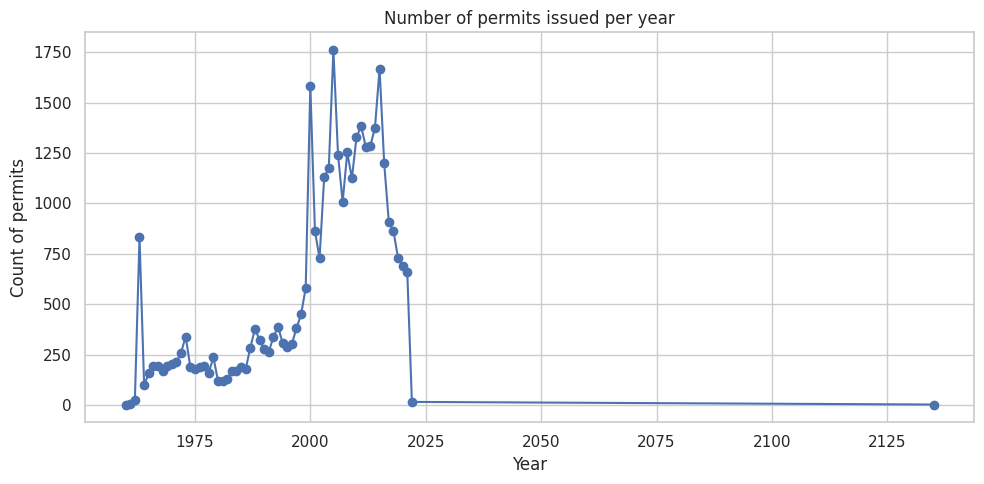

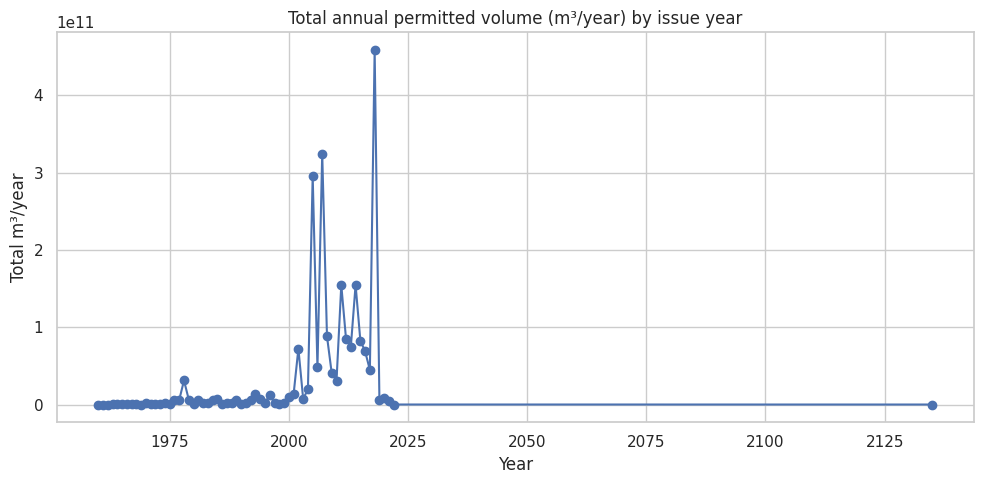

In [12]:
# Number of permits per year
plt.figure(figsize=(10, 5))
yearly_summary["permit_count"].plot(marker="o")
plt.title("Number of permits issued per year")
plt.xlabel("Year")
plt.ylabel("Count of permits")
plt.grid(True)
plt.tight_layout()
plt.show()

# Total permitted volume per year
plt.figure(figsize=(10, 5))
yearly_summary["total_m3_per_year"].plot(marker="o")
plt.title("Total annual permitted volume (m³/year) by issue year")
plt.xlabel("Year")
plt.ylabel("Total m³/year")
plt.grid(True)
plt.tight_layout()
plt.show()


In [13]:
# Year-over-year change
yearly_summary["permit_count_yoy_%"] = yearly_summary["permit_count"].pct_change() * 100
yearly_summary["total_m3_yoy_%"] = yearly_summary["total_m3_per_year"].pct_change() * 100

yearly_summary.tail()


,permit_count,total_m3_per_year,permit_count_yoy_%,total_m3_yoy_%
issued_year,,,,
2019.0,728,6.351983e+09,-15.740741,-98.614596
2020.0,689,8.345769e+09,-5.357143,31.388396
2021.0,659,4.546681e+09,-4.354136,-45.521131
2022.0,15,3.304693e+07,-97.723824,-99.273164
2135.0,2,0.000000e+00,-86.666667,-100.000000


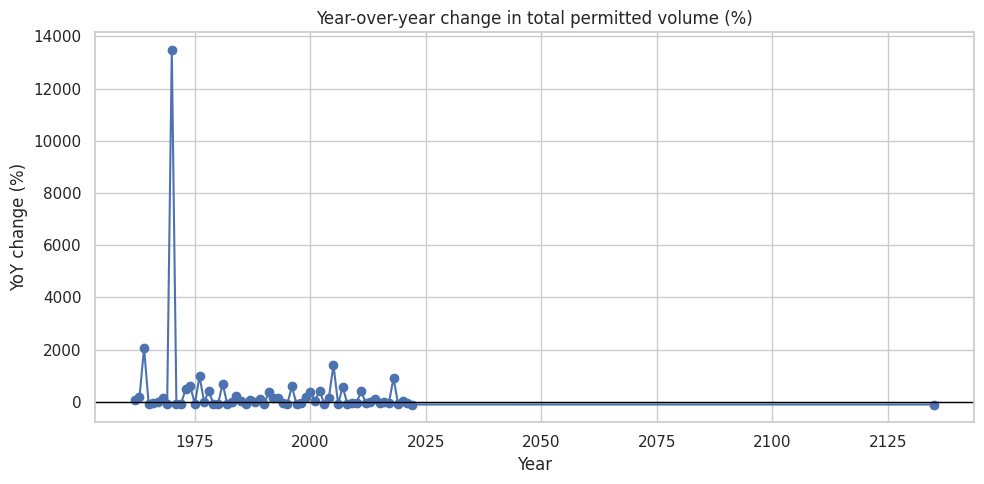

In [14]:
plt.figure(figsize=(10, 5))
yearly_summary["total_m3_yoy_%"].plot(marker="o")
plt.axhline(0, color="black", linewidth=1)
plt.title("Year-over-year change in total permitted volume (%)")
plt.xlabel("Year")
plt.ylabel("YoY change (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
# Sector-level summary (purpose_category)
sector_summary = (
    pttw
    .groupby("purpose_category")
    .agg(
        permit_count=("permitno", "nunique"),
        total_m3_per_year=("max_m3_per_year", "sum")
    )
    .sort_values("total_m3_per_year", ascending=False)
)

sector_summary["share_of_volume_%"] = (
    sector_summary["total_m3_per_year"] / sector_summary["total_m3_per_year"].sum() * 100
)

sector_summary.head(10)


,permit_count,total_m3_per_year,share_of_volume_%
purpose_category,,,
Dewatering Construction,5426,6.506659e+11,29.072625
Industrial,3939,5.908395e+11,26.399501
Miscellaneous,3902,4.993367e+11,22.311030
Agricultural,9915,4.466933e+11,19.958854
Water Supply,5039,2.240032e+10,1.000876
Dewatering,2426,1.825162e+10,0.815507
Commercial,3670,2.983505e+09,0.133307
Recreational,738,2.844120e+09,0.127079
Construction,1458,2.100822e+09,0.093868


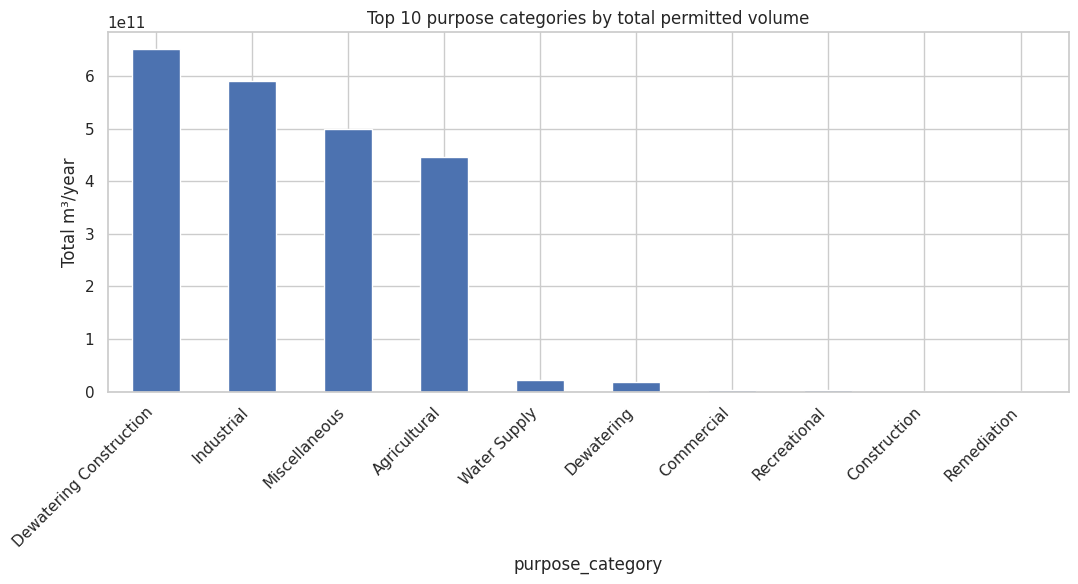

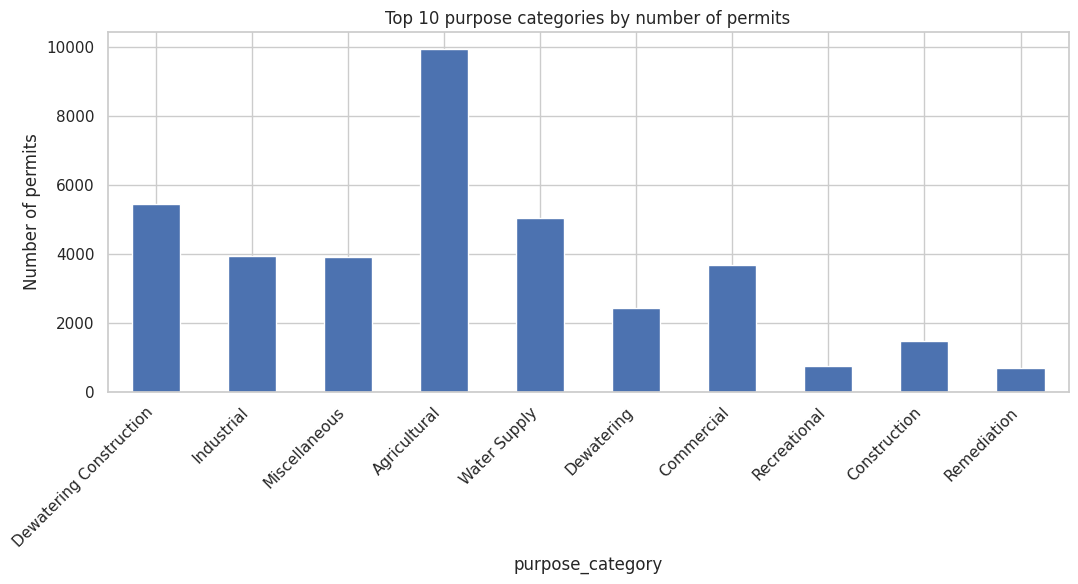

In [16]:
plt.figure(figsize=(11, 6))
sector_summary["total_m3_per_year"].head(10).plot(kind="bar")
plt.ylabel("Total m³/year")
plt.title("Top 10 purpose categories by total permitted volume")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

plt.figure(figsize=(11, 6))
sector_summary["permit_count"].head(10).plot(kind="bar")
plt.ylabel("Number of permits")
plt.title("Top 10 purpose categories by number of permits")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [17]:
# Specific purpose-level summary
specific_summary = (
    pttw
    .groupby("specific_purpose")
    .agg(
        permit_count=("permitno", "nunique"),
        total_m3_per_year=("max_m3_per_year", "sum")
    )
    .sort_values("total_m3_per_year", ascending=False)
)

specific_summary.head(15)


,permit_count,total_m3_per_year
specific_purpose,,
Construction,5706,6.502464e+11
Power Production,286,4.764145e+11
Field and Pasture Crops,3313,4.457972e+11
Dams and Reservoirs,243,4.292343e+11
Cooling Water,368,5.929312e+10
Other - Industrial,1442,5.109182e+10
Wildlife Conservation,1083,3.619921e+10
Other - Miscellaneous,595,3.379290e+10
Municipal,3189,2.106126e+10


In [18]:
# Top sectors by volume
top_sectors = sector_summary.head(5).index.tolist()
top_sectors


['Dewatering Construction',
 'Industrial',
 'Miscellaneous',
 'Agricultural',
 'Water Supply']

In [19]:
sector_year = (
    pttw[pttw["purpose_category"].isin(top_sectors)]
    .dropna(subset=["issued_year"])
    .groupby(["issued_year", "purpose_category"])
    .agg(total_m3_per_year=("max_m3_per_year", "sum"))
    .reset_index()
)

sector_year.head()


,issued_year,purpose_category,total_m3_per_year
0,1960.0,Industrial,0.0
1,1961.0,Agricultural,0.0
2,1961.0,Industrial,9292024.0
3,1961.0,Water Supply,89534.5
4,1962.0,Agricultural,0.0


In [20]:
sector_year_pivot = sector_year.pivot(
    index="issued_year", columns="purpose_category", values="total_m3_per_year"
).fillna(0)

sector_year_pivot.head()


purpose_category,Agricultural,Dewatering Construction,Industrial,Miscellaneous,Water Supply
issued_year,,,,,
1960.0,0.000000e+00,0.0,0.000000e+00,0.00,0.0
1961.0,0.000000e+00,0.0,9.292024e+06,0.00,89534.5
1962.0,0.000000e+00,0.0,3.633696e+06,776563.05,11913702.2
1963.0,3.829552e+07,0.0,3.318580e+04,0.00,7350654.7
1964.0,7.110008e+05,0.0,1.007225e+09,477875.52,6555928.0


<Figure size 1100x600 with 0 Axes>

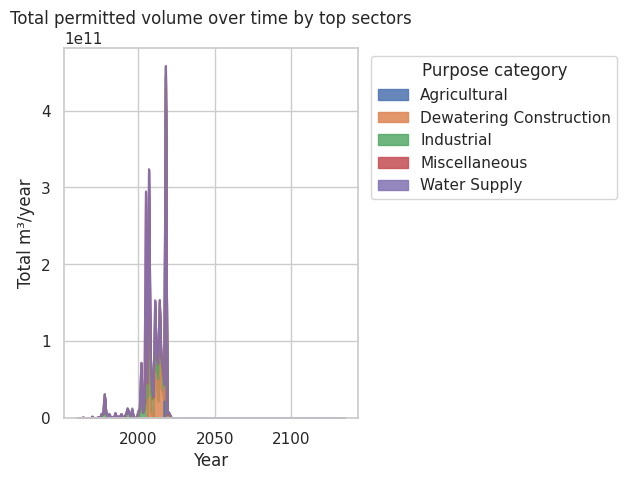

In [21]:
plt.figure(figsize=(11, 6))
sector_year_pivot.plot(kind="area", stacked=True, alpha=0.85)
plt.title("Total permitted volume over time by top sectors")
plt.xlabel("Year")
plt.ylabel("Total m³/year")
plt.legend(title="Purpose category", loc="upper left", bbox_to_anchor=(1.02, 1.0))
plt.tight_layout()
plt.show()


In [22]:
pttw["surface_or_ground"].value_counts(dropna=False)


,count
surface_or_ground,
Ground Water,28573
Surface Water,22119
Surface and Ground Water,12994
Pumping Test,1771
,237


In [23]:
source_summary = (
    pttw
    .groupby("surface_or_ground")
    .agg(
        permit_count=("permitno", "nunique"),
        total_m3_per_year=("max_m3_per_year", "sum")
    )
    .sort_values("total_m3_per_year", ascending=False)
)

source_summary["share_of_volume_%"] = (
    source_summary["total_m3_per_year"] / source_summary["total_m3_per_year"].sum() * 100
)

source_summary


,permit_count,total_m3_per_year,share_of_volume_%
surface_or_ground,,,
Surface Water,13746,1.762669e+12,78.758402
Surface and Ground Water,4396,4.533779e+11,20.257530
Ground Water,16325,2.198109e+10,0.982145
Pumping Test,1043,3.687233e+07,0.001648
,220,6.172615e+06,0.000276


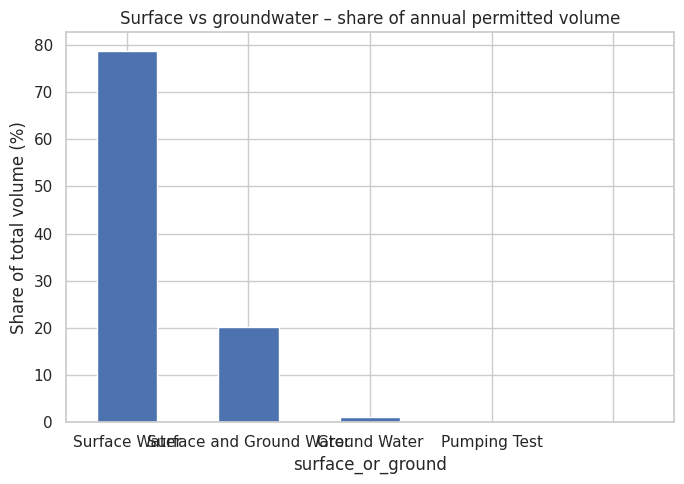

In [24]:
plt.figure(figsize=(7, 5))
source_summary["share_of_volume_%"].plot(kind="bar")
plt.ylabel("Share of total volume (%)")
plt.title("Surface vs groundwater – share of annual permitted volume")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [25]:
pttw[["latitude", "longitude"]].describe()


,latitude,longitude
count,65694.000000,65694.000000
mean,44.555796,-80.249458
std,2.038136,3.114828
min,41.748947,-95.111422
25%,43.161427,-80.752171
50%,43.981075,-80.056467
75%,45.146648,-79.251001
max,55.709593,-74.377171


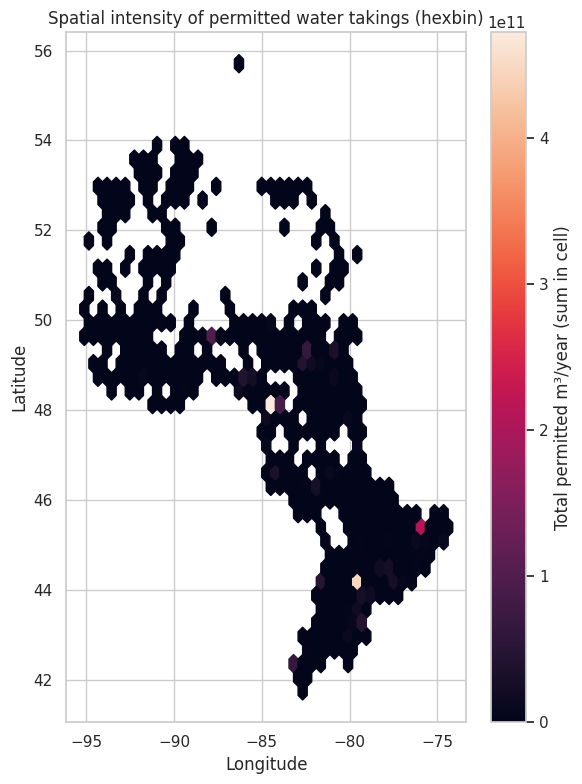

In [26]:
plt.figure(figsize=(6, 8))

mask = pttw[["longitude", "latitude", "max_m3_per_year"]].dropna()

hb = plt.hexbin(
    mask["longitude"],
    mask["latitude"],
    C=mask["max_m3_per_year"],
    reduce_C_function=np.sum,
    gridsize=40
)

plt.colorbar(hb, label="Total permitted m³/year (sum in cell)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Spatial intensity of permitted water takings (hexbin)")
plt.tight_layout()
plt.show()


In [27]:
pttw["max_m3_per_year"].describe()


,max_m3_per_year
count,6.398200e+04
mean,3.497969e+07
std,2.267310e+09
min,0.000000e+00
25%,1.200000e+04
50%,8.216250e+04
75%,4.192488e+05
max,4.450000e+11


In [28]:
q95 = pttw["max_m3_per_year"].quantile(0.95)
q99 = pttw["max_m3_per_year"].quantile(0.99)
q95, q99


(np.float64(5370845.91), np.float64(109460826.01800199))

In [29]:
top_outliers = (
    pttw[pttw["max_m3_per_year"] >= q99]
    .sort_values("max_m3_per_year", ascending=False)
    .loc[:, [
        "permitno",
        "purpose_category",
        "specific_purpose",
        "surface_or_ground",
        "max_m3_per_year",
        "issued_date",
        "expiry_date"
    ]]
)

top_outliers.head(20)


,permitno,purpose_category,specific_purpose,surface_or_ground,max_m3_per_year,issued_date,expiry_date
37608,8752-AX8JVC,Agricultural,Field and Pasture Crops,Surface Water,4.450000e+11,2018-05-08,2028-04-19
62626,8817-6EWHS5,Miscellaneous,Dams and Reservoirs,Surface Water,2.339650e+11,2005-08-24,2015-10-01
63782,4446-79NMNC,Dewatering Construction,Construction,Surface and Ground Water,2.339650e+11,2007-12-07,2015-10-01
1987,01-P-1247,Industrial,Power Production,Surface Water,6.314500e+10,2002-07-02,2007-07-31
57534,5066-8HLRJ9,Dewatering Construction,Construction,Surface and Ground Water,5.146500e+10,2011-12-20,2014-08-31
57977,7783-9MHRGY,Dewatering Construction,Construction,Surface and Ground Water,5.146500e+10,2014-07-31,2014-12-19
11901,4453-7CVPCV,Miscellaneous,Dams and Reservoirs,Surface Water,4.258800e+10,2008-03-20,2017-07-20
12074,4543-748QS3,Miscellaneous,Dams and Reservoirs,Surface Water,4.258800e+10,2007-07-20,2017-07-20
53606,5066-8HLRJ9,Dewatering Construction,Construction,Surface and Ground Water,4.051500e+10,2011-12-20,2014-08-31
54814,7783-9MHRGY,Dewatering Construction,Construction,Surface and Ground Water,4.051500e+10,2014-07-31,2014-12-19


In [30]:
num_cols = [
    "max_l_per_day",
    "days_per_year",
    "max_m3_per_day",
    "max_m3_per_year",
    "permit_duration_years"
]

num_cols = [c for c in num_cols if c in pttw.columns]

corr = pttw[num_cols].corr()
corr


,max_l_per_day,days_per_year,max_m3_per_day,max_m3_per_year,permit_duration_years
max_l_per_day,1.000000,-0.001970,1.000000,0.809844,0.001737
days_per_year,-0.001970,1.000000,-0.001970,0.008160,-0.007331
max_m3_per_day,1.000000,-0.001970,1.000000,0.809844,0.001737
max_m3_per_year,0.809844,0.008160,0.809844,1.000000,0.002493
permit_duration_years,0.001737,-0.007331,0.001737,0.002493,1.000000


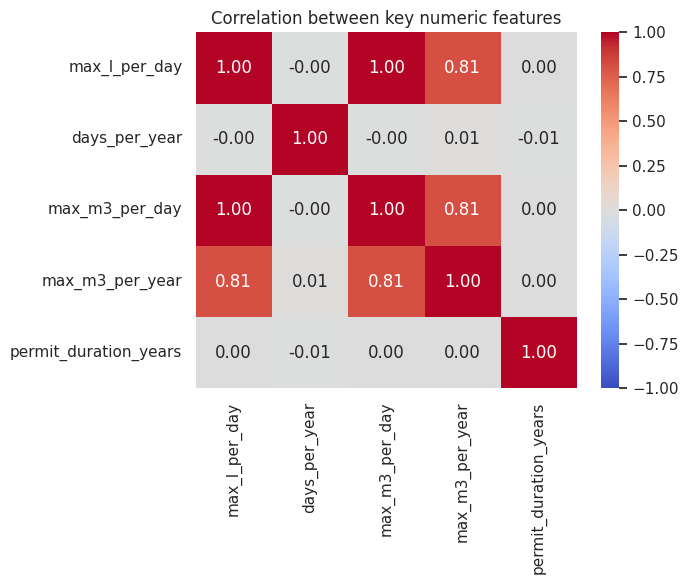

In [31]:
plt.figure(figsize=(7, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation between key numeric features")
plt.tight_layout()
plt.show()


In [32]:
summaries_dir = "data/processed/summaries"
os.makedirs(summaries_dir, exist_ok=True)

yearly_summary.to_csv(os.path.join(summaries_dir, "yearly_summary.csv"))
sector_summary.to_csv(os.path.join(summaries_dir, "sector_summary.csv"))
source_summary.to_csv(os.path.join(summaries_dir, "source_summary.csv"))
top_outliers.to_csv(os.path.join(summaries_dir, "largest_permits_top_outliers.csv"), index=False)

os.listdir(summaries_dir)


['yearly_summary.csv',
 'sector_summary.csv',
 'largest_permits_top_outliers.csv',
 'source_summary.csv']

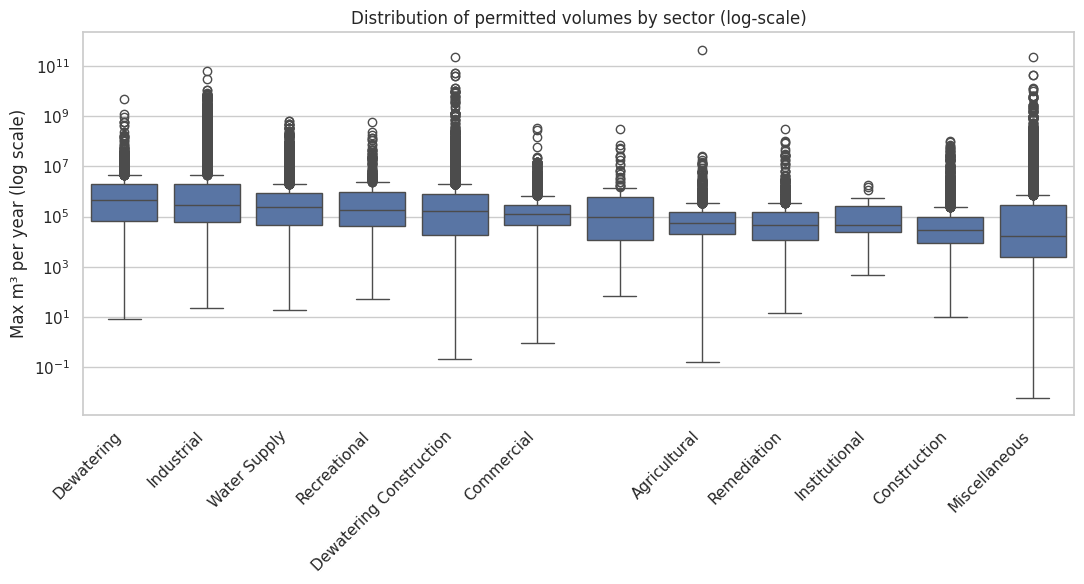

In [33]:
plt.figure(figsize=(11, 6))

# keep only permits with positive volume and non-null sector
mask = (pttw["max_m3_per_year"] > 0) & pttw["purpose_category"].notna()
data = pttw.loc[mask, :].copy()

# sort sectors by median volume so the plot reads nicely
order = (
    data.groupby("purpose_category")["max_m3_per_year"]
    .median()
    .sort_values(ascending=False)
    .index
)

sns.boxplot(
    data=data,
    x="purpose_category",
    y="max_m3_per_year",
    order=order
)
plt.yscale("log")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Max m³ per year (log scale)")
plt.xlabel("")
plt.title("Distribution of permitted volumes by sector (log-scale)")
plt.tight_layout()
plt.show()
